In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

from keras.layers import Dense

file = tf.keras.utils
pd.set_option('display.max_columns',40)
pd.set_option('display.max_rows',20)

dataframe = pd.read_csv(r'H1.csv' )
dataframe.head(5)

Using TensorFlow backend.


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
dataframe = dataframe[dataframe['IsCanceled'] == 0]
dataframe.head(5)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
dataframe. MarketSegment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups'], dtype=object)

In [4]:
dataframe. CustomerType.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [5]:
dataframe['MarketSegment'].replace('Direct', 0, inplace=True)
dataframe['MarketSegment'].replace('Corporate', 1, inplace=True)
dataframe['MarketSegment'].replace('Online TA', 2, inplace=True)
dataframe['MarketSegment'].replace('Offline TA/TO', 3, inplace=True)
dataframe['MarketSegment'].replace('Complementary', 4, inplace=True)
dataframe['MarketSegment'].replace('Groups', 5, inplace=True)
dataframe.head(5)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,0,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,0,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,0,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,1,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,2,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
#Splitting of the dataset into train, test, validation 
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataframe, test_size=0.2) #creation of traind and test dataset
train, val = train_test_split(train, test_size=0.2)#creation of training and vaidation dataset
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')
dataframe.head(5)

18520 train examples
4630 validation examples
5788 test examples


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,0,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,0,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,0,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,1,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,2,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
def df_to_dataset(dataframe, shuffle=True,batch_size=32):
    dataframe_1 = dataframe.copy()
    dataframe_1 = dataframe_1.dropna()
    data_labels = dataframe_1.pop('MarketSegment')
  
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe_1), data_labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe_1))
    ds = ds.batch(batch_size)
    return ds

In [8]:
batch_size = 64 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)


In [9]:
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [10]:
#Demonstration of the dataset in training sample
for feature_batch, label_batch in train_ds.take(1):
    print('Every feature:', list(feature_batch.keys()))
    print('A batch of Country:', feature_batch['Country'])
    print('A batch of targets:', label_batch )

Every feature: ['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'Meal', 'Country', 'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType', 'BookingChanges', 'DepositType', 'Agent', 'Company', 'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate']
A batch of Country: tf.Tensor(
[b'ESP' b'PRT' b'PRT' b'IRL' b'DEU' b'PRT' b'BEL' b'PRT' b'GBR' b'FRA'
 b'RUS' b'FRA' b'PRT' b'DEU' b'GBR' b'USA' b'PRT' b'PRT' b'NLD' b'GBR'
 b'ESP' b'PRT' b'GBR' b'PRT' b'GBR' b'PRT' b'LTU' b'IRL' b'PRT' b'ESP'
 b'PRT' b'ESP' b'GBR' b'CN' b'GBR' b'PRT' b'ESP' b'PRT' b'ITA' b'PRT'
 b'GBR' b'GBR' b'IRL' b'BEL' b'PRT' b'GBR' b'GBR' b'GBR' b'PRT' b'CHN'
 b'PRT' b'PRT' b'ESP' b'IRL' b'PRT' b'PRT' b'PRT' b'C

In [11]:
example_batch = next(iter(train_ds))[0]

def demo(feature_column):
    feature_layer = layers.DenseFeatures(feature_column)
    print(feature_layer(example_batch).numpy())

In [12]:
from tensorflow import feature_column
ADR = feature_column.numeric_column("ADR")

In [13]:
dataframe.CustomerType.value_counts()

Transient          20793
Transient-Party     6272
Contract            1619
Group                254
Name: CustomerType, dtype: int64

In [14]:
from tensorflow import feature_column
CT = feature_column.categorical_column_with_vocabulary_list(
      'CustomerType', ['Transient', 'Contract', 'Transient-Party','Group'])
CT_one_hot = feature_column.indicator_column(CT)
#demo(CT_one_hot)

In [22]:
feature_columns = []

# numeric cols
for header in ['Adults','Children','Babies', 'ADR']:
    feature_columns.append(feature_column.numeric_column(header))

CustomerType = feature_column.categorical_column_with_vocabulary_list(
      'CustomerType', ['Transient', 'Contract', 'Transient-Party', 'Group'])
CustomerType_one_hot = feature_column.indicator_column(CustomerType)
feature_columns.append(CustomerType_one_hot)

Meal = feature_column.categorical_column_with_vocabulary_list(
      'Meal', ['BB', 'FB', 'HB', 'SC', 'Undefined'])
Meal_one_hot = feature_column.indicator_column(Meal)
feature_columns.append(Meal_one_hot)

ArrivalDateMonth = feature_column.categorical_column_with_vocabulary_list(
      'ArrivalDateMonth', ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ArrivalDateMonth_one_hot = feature_column.indicator_column(ArrivalDateMonth)
feature_columns.append(ArrivalDateMonth_one_hot)

ReservedRoomType = feature_column.categorical_column_with_vocabulary_list(
      'ReservedRoomType', ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'P', 'L'])
ReservedRoomType_one_hot = feature_column.indicator_column(ReservedRoomType)
feature_columns.append(ReservedRoomType_one_hot)

Country = feature_column.categorical_column_with_vocabulary_list(
      'Country', ['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI'])
Country_one_hot = feature_column.indicator_column(Country)
feature_columns.append(Country_one_hot)

In [16]:
def plot_model_accuracy():
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

def plot_model_loss():    
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

## Default Condition: Initiated the weight and bias randomly

In [19]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=500)


Epoch 1/500
286/286 [==============================] - 7s 24ms/step - loss: 1.4464 - accuracy: 0.4597 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/500
286/286 [==============================] - 4s 13ms/step - loss: 1.0808 - accuracy: 0.5473 - val_loss: 1.0479 - val_accuracy: 0.5623
Epoch 3/500
286/286 [==============================] - 4s 14ms/step - loss: 1.0535 - accuracy: 0.5671 - val_loss: 1.0626 - val_accuracy: 0.5706
Epoch 4/500
286/286 [==============================] - 4s 15ms/step - loss: 0.9918 - accuracy: 0.5815 - val_loss: 1.1194 - val_accuracy: 0.5731
Epoch 5/500
286/286 [==============================] - 4s 15ms/step - loss: 0.9814 - accuracy: 0.5831 - val_loss: 0.9692 - val_accuracy: 0.5948
Epoch 6/500
286/286 [==============================] - 4s 15ms/step - loss: 0.9542 - accuracy: 0.5955 - val_loss: 0.9635 - val_accuracy: 0.5954
Epoch 7/500
286/286 [==============================] - 4s 13ms/step - loss: 0.9434 - accuracy: 0.5987 - val_loss: 0.9767 - val_a

286/286 [==============================] - 5s 16ms/step - loss: 0.6519 - accuracy: 0.7052 - val_loss: 1.0263 - val_accuracy: 0.6369
Epoch 114/500
286/286 [==============================] - 5s 16ms/step - loss: 0.6528 - accuracy: 0.7047 - val_loss: 1.0261 - val_accuracy: 0.6457
Epoch 115/500
286/286 [==============================] - 5s 16ms/step - loss: 0.6498 - accuracy: 0.7057 - val_loss: 1.0475 - val_accuracy: 0.6373
Epoch 116/500
286/286 [==============================] - 5s 16ms/step - loss: 0.6498 - accuracy: 0.7048 - val_loss: 1.0462 - val_accuracy: 0.6321
Epoch 117/500
286/286 [==============================] - 4s 16ms/step - loss: 0.6443 - accuracy: 0.7076 - val_loss: 1.0539 - val_accuracy: 0.6428
Epoch 118/500
286/286 [==============================] - 4s 16ms/step - loss: 0.6430 - accuracy: 0.7078 - val_loss: 1.0340 - val_accuracy: 0.6384
Epoch 119/500
286/286 [==============================] - 4s 16ms/step - loss: 0.6426 - accuracy: 0.7106 - val_loss: 1.0499 - val_accuracy:

286/286 [==============================] - 4s 14ms/step - loss: 0.5937 - accuracy: 0.7308 - val_loss: 1.2240 - val_accuracy: 0.6391
Epoch 226/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5847 - accuracy: 0.7314 - val_loss: 1.3148 - val_accuracy: 0.6398
Epoch 227/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5868 - accuracy: 0.7295 - val_loss: 1.2511 - val_accuracy: 0.6406
Epoch 228/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5822 - accuracy: 0.7327 - val_loss: 1.2690 - val_accuracy: 0.6501
Epoch 229/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5832 - accuracy: 0.7313 - val_loss: 1.2310 - val_accuracy: 0.6419
Epoch 230/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5860 - accuracy: 0.7315 - val_loss: 1.2551 - val_accuracy: 0.6455
Epoch 231/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5906 - accuracy: 0.7286 - val_loss: 1.2686 - val_accuracy:

286/286 [==============================] - 4s 13ms/step - loss: 0.5570 - accuracy: 0.7427 - val_loss: 1.4498 - val_accuracy: 0.6479
Epoch 338/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5583 - accuracy: 0.7422 - val_loss: 1.4533 - val_accuracy: 0.6424
Epoch 339/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5604 - accuracy: 0.7403 - val_loss: 1.4744 - val_accuracy: 0.6441
Epoch 340/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5584 - accuracy: 0.7432 - val_loss: 1.4777 - val_accuracy: 0.6523
Epoch 341/500
286/286 [==============================] - 5s 16ms/step - loss: 0.5559 - accuracy: 0.7422 - val_loss: 1.5167 - val_accuracy: 0.6452
Epoch 342/500
286/286 [==============================] - 5s 16ms/step - loss: 0.5601 - accuracy: 0.7403 - val_loss: 1.5218 - val_accuracy: 0.6426
Epoch 343/500
286/286 [==============================] - 4s 16ms/step - loss: 0.5552 - accuracy: 0.7382 - val_loss: 1.4577 - val_accuracy:

286/286 [==============================] - 4s 13ms/step - loss: 0.5372 - accuracy: 0.7502 - val_loss: 1.6674 - val_accuracy: 0.6470
Epoch 450/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5353 - accuracy: 0.7515 - val_loss: 1.6599 - val_accuracy: 0.6426
Epoch 451/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5368 - accuracy: 0.7521 - val_loss: 1.6990 - val_accuracy: 0.6435
Epoch 452/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5415 - accuracy: 0.7488 - val_loss: 1.6140 - val_accuracy: 0.6389
Epoch 453/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5348 - accuracy: 0.7500 - val_loss: 1.6278 - val_accuracy: 0.6492
Epoch 454/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5363 - accuracy: 0.7516 - val_loss: 1.6235 - val_accuracy: 0.6487
Epoch 455/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5377 - accuracy: 0.7509 - val_loss: 1.6940 - val_accuracy:

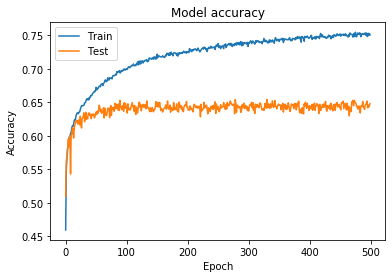

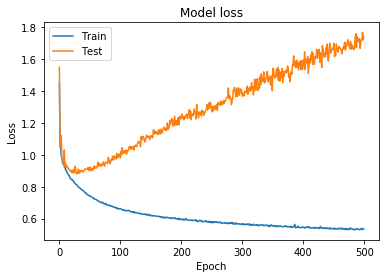

In [20]:
#Ploting the accuracy and loss comparsion for Training and validation 
plot_model_accuracy()
plot_model_loss() 

<b> Execution Summary:</b> After executing epochs= 500 , please find the observation below :
* Maximum Accuracy of Training Model = 75.40 %
* Maximum Accuracy of Validation Model = 65.31%

## Case 1: Initiated the weight = 0

In [27]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

model = tf.keras.Sequential([
  feature_layer,
    
  layers.Dense(256, activation='relu',kernel_initializer='zeros'),
  layers.Dense(512, activation='relu',kernel_initializer='zeros'),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=100)

Epoch 1/100
286/286 [==============================] - 3s 12ms/step - loss: 1.7210 - accuracy: 0.3985 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
286/286 [==============================] - 2s 7ms/step - loss: 1.6230 - accuracy: 0.3993 - val_loss: 1.5902 - val_accuracy: 0.4059
Epoch 3/100
286/286 [==============================] - 2s 7ms/step - loss: 1.5662 - accuracy: 0.3993 - val_loss: 1.5480 - val_accuracy: 0.4059
Epoch 4/100
286/286 [==============================] - 2s 7ms/step - loss: 1.5333 - accuracy: 0.3993 - val_loss: 1.5241 - val_accuracy: 0.4059
Epoch 5/100
286/286 [==============================] - 2s 7ms/step - loss: 1.5145 - accuracy: 0.3993 - val_loss: 1.5102 - val_accuracy: 0.4059
Epoch 6/100
286/286 [==============================] - 2s 7ms/step - loss: 1.5032 - accuracy: 0.3993 - val_loss: 1.5015 - val_accuracy: 0.4059
Epoch 7/100
286/286 [==============================] - 2s 7ms/step - loss: 1.4956 - accuracy: 0.3993 - val_loss: 1.4958 - val_accurac

Epoch 58/100
286/286 [==============================] - 3s 9ms/step - loss: 1.4724 - accuracy: 0.3993 - val_loss: 1.4784 - val_accuracy: 0.4059
Epoch 59/100
286/286 [==============================] - 2s 9ms/step - loss: 1.4725 - accuracy: 0.3993 - val_loss: 1.4783 - val_accuracy: 0.4059
Epoch 60/100
286/286 [==============================] - 2s 9ms/step - loss: 1.4726 - accuracy: 0.3993 - val_loss: 1.4784 - val_accuracy: 0.4059
Epoch 61/100
286/286 [==============================] - 2s 9ms/step - loss: 1.4726 - accuracy: 0.3993 - val_loss: 1.4783 - val_accuracy: 0.4059
Epoch 62/100
286/286 [==============================] - 2s 9ms/step - loss: 1.4725 - accuracy: 0.3993 - val_loss: 1.4784 - val_accuracy: 0.4059
Epoch 63/100
286/286 [==============================] - 2s 9ms/step - loss: 1.4726 - accuracy: 0.3993 - val_loss: 1.4784 - val_accuracy: 0.4059
Epoch 64/100
286/286 [==============================] - 2s 9ms/step - loss: 1.4725 - accuracy: 0.3993 - val_loss: 1.4784 - val_accuracy:

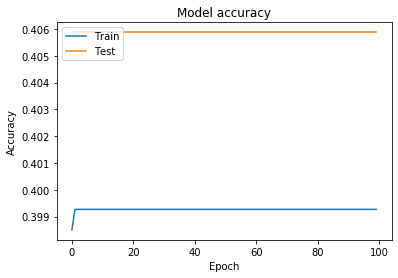

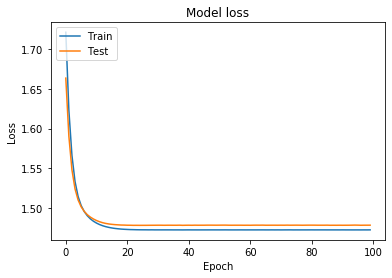

In [29]:
#Ploting the accuracy and loss comparsion for Training and validation 
plot_model_accuracy()
plot_model_loss() 

<b> Execution Summary:</b> After executing epochs= 100 , please find the observation below :
* Maximum Accuracy of Training Model = 33.93 % . The Training Model Accuracy remains the same throughout the execution
* Maximum Accuracy of Validation Model = 40.59 %. The Validation Model Accuracy remains the same throughout the execution

## Case 2 : Initiated the bias = zero

In [31]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

model = tf.keras.Sequential([
  feature_layer,
    
  layers.Dense(256, activation='relu',bias_initializer='zeros'),
  layers.Dense(512, activation='relu',bias_initializer='zeros'),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=500)

Epoch 1/500
286/286 [==============================] - 4s 13ms/step - loss: 1.3341 - accuracy: 0.4530 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/500
286/286 [==============================] - 2s 7ms/step - loss: 1.0762 - accuracy: 0.5458 - val_loss: 1.0830 - val_accuracy: 0.5270
Epoch 3/500
286/286 [==============================] - 2s 7ms/step - loss: 1.0239 - accuracy: 0.5655 - val_loss: 0.9944 - val_accuracy: 0.5893
Epoch 4/500
286/286 [==============================] - 2s 7ms/step - loss: 0.9967 - accuracy: 0.5753 - val_loss: 0.9838 - val_accuracy: 0.5814
Epoch 5/500
286/286 [==============================] - 2s 7ms/step - loss: 0.9855 - accuracy: 0.5792 - val_loss: 1.0410 - val_accuracy: 0.5257
Epoch 6/500
286/286 [==============================] - 2s 7ms/step - loss: 0.9627 - accuracy: 0.5875 - val_loss: 0.9477 - val_accuracy: 0.5928
Epoch 7/500
286/286 [==============================] - 2s 7ms/step - loss: 0.9467 - accuracy: 0.5961 - val_loss: 1.0130 - val_accurac

Epoch 58/500
286/286 [==============================] - 2s 9ms/step - loss: 0.7249 - accuracy: 0.6764 - val_loss: 0.9198 - val_accuracy: 0.6305
Epoch 59/500
286/286 [==============================] - 2s 9ms/step - loss: 0.7241 - accuracy: 0.6758 - val_loss: 0.9247 - val_accuracy: 0.6365
Epoch 60/500
286/286 [==============================] - 2s 9ms/step - loss: 0.7210 - accuracy: 0.6804 - val_loss: 0.9179 - val_accuracy: 0.6413
Epoch 61/500
286/286 [==============================] - 2s 9ms/step - loss: 0.7169 - accuracy: 0.6822 - val_loss: 0.9157 - val_accuracy: 0.6382
Epoch 62/500
286/286 [==============================] - 2s 9ms/step - loss: 0.7198 - accuracy: 0.6807 - val_loss: 0.9219 - val_accuracy: 0.6371
Epoch 63/500
286/286 [==============================] - 2s 9ms/step - loss: 0.7161 - accuracy: 0.6790 - val_loss: 0.9274 - val_accuracy: 0.6457
Epoch 64/500
286/286 [==============================] - 2s 9ms/step - loss: 0.7121 - accuracy: 0.6805 - val_loss: 0.9413 - val_accuracy:

Epoch 115/500
286/286 [==============================] - 2s 9ms/step - loss: 0.6460 - accuracy: 0.7065 - val_loss: 1.0200 - val_accuracy: 0.6435
Epoch 116/500
286/286 [==============================] - 2s 9ms/step - loss: 0.6497 - accuracy: 0.7061 - val_loss: 1.0408 - val_accuracy: 0.6435
Epoch 117/500
286/286 [==============================] - 2s 9ms/step - loss: 0.6396 - accuracy: 0.7114 - val_loss: 1.0672 - val_accuracy: 0.6487
Epoch 118/500
286/286 [==============================] - 2s 9ms/step - loss: 0.6412 - accuracy: 0.7078 - val_loss: 1.0496 - val_accuracy: 0.6444
Epoch 119/500
286/286 [==============================] - 2s 9ms/step - loss: 0.6403 - accuracy: 0.7083 - val_loss: 1.0245 - val_accuracy: 0.6389
Epoch 120/500
286/286 [==============================] - 2s 9ms/step - loss: 0.6380 - accuracy: 0.7106 - val_loss: 1.0396 - val_accuracy: 0.6435
Epoch 121/500
286/286 [==============================] - 2s 9ms/step - loss: 0.6407 - accuracy: 0.7077 - val_loss: 1.0289 - val_ac

286/286 [==============================] - 2s 9ms/step - loss: 0.5846 - accuracy: 0.7310 - val_loss: 1.2516 - val_accuracy: 0.6354
Epoch 228/500
286/286 [==============================] - 2s 9ms/step - loss: 0.5859 - accuracy: 0.7328 - val_loss: 1.2869 - val_accuracy: 0.6483
Epoch 229/500
286/286 [==============================] - 2s 9ms/step - loss: 0.5841 - accuracy: 0.7324 - val_loss: 1.2892 - val_accuracy: 0.6409
Epoch 230/500
286/286 [==============================] - 2s 9ms/step - loss: 0.5856 - accuracy: 0.7325 - val_loss: 1.2944 - val_accuracy: 0.6433
Epoch 231/500
286/286 [==============================] - 2s 9ms/step - loss: 0.5906 - accuracy: 0.7296 - val_loss: 1.2719 - val_accuracy: 0.6417
Epoch 232/500
286/286 [==============================] - 2s 9ms/step - loss: 0.5863 - accuracy: 0.7283 - val_loss: 1.2953 - val_accuracy: 0.6384
Epoch 233/500
286/286 [==============================] - 2s 9ms/step - loss: 0.5828 - accuracy: 0.7307 - val_loss: 1.2880 - val_accuracy: 0.6409

286/286 [==============================] - 3s 10ms/step - loss: 0.5607 - accuracy: 0.7410 - val_loss: 1.4435 - val_accuracy: 0.6468
Epoch 340/500
286/286 [==============================] - 2s 8ms/step - loss: 0.5539 - accuracy: 0.7419 - val_loss: 1.4750 - val_accuracy: 0.6384
Epoch 341/500
286/286 [==============================] - 2s 9ms/step - loss: 0.5562 - accuracy: 0.7424 - val_loss: 1.4786 - val_accuracy: 0.6378
Epoch 342/500
286/286 [==============================] - 2s 8ms/step - loss: 0.5593 - accuracy: 0.7402 - val_loss: 1.5363 - val_accuracy: 0.6404
Epoch 343/500
286/286 [==============================] - 2s 9ms/step - loss: 0.5603 - accuracy: 0.7405 - val_loss: 1.4694 - val_accuracy: 0.6444
Epoch 344/500
286/286 [==============================] - 2s 8ms/step - loss: 0.5573 - accuracy: 0.7413 - val_loss: 1.4659 - val_accuracy: 0.6439
Epoch 345/500
286/286 [==============================] - 2s 9ms/step - loss: 0.5512 - accuracy: 0.7453 - val_loss: 1.4781 - val_accuracy: 0.640

286/286 [==============================] - 2s 8ms/step - loss: 0.5438 - accuracy: 0.7454 - val_loss: 1.6218 - val_accuracy: 0.6338
Epoch 452/500
286/286 [==============================] - 2s 9ms/step - loss: 0.5422 - accuracy: 0.7466 - val_loss: 1.6556 - val_accuracy: 0.6398
Epoch 453/500
286/286 [==============================] - 2s 9ms/step - loss: 0.5378 - accuracy: 0.7496 - val_loss: 1.6431 - val_accuracy: 0.6413
Epoch 454/500
286/286 [==============================] - 2s 9ms/step - loss: 0.5442 - accuracy: 0.7473 - val_loss: 1.6632 - val_accuracy: 0.6439
Epoch 455/500
286/286 [==============================] - 2s 8ms/step - loss: 0.5420 - accuracy: 0.7486 - val_loss: 1.6011 - val_accuracy: 0.6446
Epoch 456/500
286/286 [==============================] - 2s 8ms/step - loss: 0.5431 - accuracy: 0.7467 - val_loss: 1.6179 - val_accuracy: 0.6470
Epoch 457/500
286/286 [==============================] - 2s 9ms/step - loss: 0.5413 - accuracy: 0.7474 - val_loss: 1.6394 - val_accuracy: 0.6463

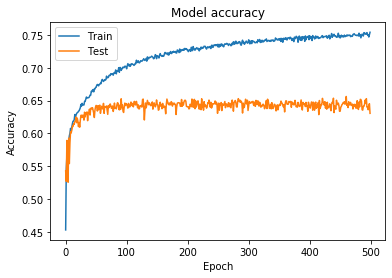

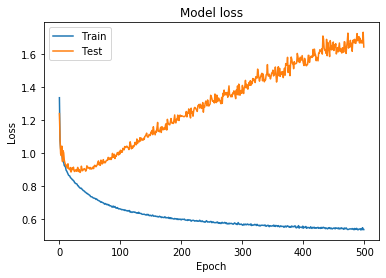

In [32]:
#Ploting the accuracy and loss comparsion for Training and validation 
plot_model_accuracy()
plot_model_loss() 

<b> Execution Summary:</b> After executing epochs= 500 , please find the observation below :
* Maximum Accuracy of Training Model = 75.40 %
* Maximum Accuracy of Validation Model = 65.29%

## Case 3(a) : Initialize the W values to Truncated Normal

In [33]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

model = tf.keras.Sequential([
  feature_layer,
    
  layers.Dense(256, activation='relu',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)),
  layers.Dense(512, activation='relu',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=500)

Epoch 1/500
286/286 [==============================] - 7s 25ms/step - loss: 1.2569 - accuracy: 0.4816 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/500
286/286 [==============================] - 4s 13ms/step - loss: 1.0173 - accuracy: 0.5687 - val_loss: 0.9885 - val_accuracy: 0.5860
Epoch 3/500
286/286 [==============================] - 4s 13ms/step - loss: 0.9884 - accuracy: 0.5795 - val_loss: 0.9889 - val_accuracy: 0.5796
Epoch 4/500
286/286 [==============================] - 4s 13ms/step - loss: 0.9606 - accuracy: 0.5927 - val_loss: 0.9868 - val_accuracy: 0.5910
Epoch 5/500
286/286 [==============================] - 4s 13ms/step - loss: 0.9473 - accuracy: 0.5955 - val_loss: 0.9671 - val_accuracy: 0.5930
Epoch 6/500
286/286 [==============================] - 4s 13ms/step - loss: 0.9373 - accuracy: 0.6009 - val_loss: 0.9508 - val_accuracy: 0.6003
Epoch 7/500
286/286 [==============================] - 4s 13ms/step - loss: 0.9191 - accuracy: 0.6065 - val_loss: 0.9325 - val_a

286/286 [==============================] - 4s 13ms/step - loss: 0.6430 - accuracy: 0.7063 - val_loss: 1.0210 - val_accuracy: 0.6492
Epoch 114/500
286/286 [==============================] - 4s 13ms/step - loss: 0.6486 - accuracy: 0.7063 - val_loss: 1.0438 - val_accuracy: 0.6367
Epoch 115/500
286/286 [==============================] - 4s 13ms/step - loss: 0.6479 - accuracy: 0.7066 - val_loss: 1.0323 - val_accuracy: 0.6446
Epoch 116/500
286/286 [==============================] - 4s 14ms/step - loss: 0.6428 - accuracy: 0.7099 - val_loss: 1.0465 - val_accuracy: 0.6398
Epoch 117/500
286/286 [==============================] - 4s 13ms/step - loss: 0.6425 - accuracy: 0.7079 - val_loss: 1.0349 - val_accuracy: 0.6362
Epoch 118/500
286/286 [==============================] - 4s 13ms/step - loss: 0.6444 - accuracy: 0.7081 - val_loss: 1.0551 - val_accuracy: 0.6358
Epoch 119/500
286/286 [==============================] - 4s 13ms/step - loss: 0.6433 - accuracy: 0.7094 - val_loss: 1.0277 - val_accuracy:

286/286 [==============================] - 4s 13ms/step - loss: 0.5877 - accuracy: 0.7275 - val_loss: 1.2692 - val_accuracy: 0.6490
Epoch 226/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5837 - accuracy: 0.7307 - val_loss: 1.2655 - val_accuracy: 0.6395
Epoch 227/500
286/286 [==============================] - 3s 12ms/step - loss: 0.5827 - accuracy: 0.7330 - val_loss: 1.2452 - val_accuracy: 0.6371
Epoch 228/500
286/286 [==============================] - 3s 12ms/step - loss: 0.5903 - accuracy: 0.7289 - val_loss: 1.2594 - val_accuracy: 0.6389
Epoch 229/500
286/286 [==============================] - 4s 12ms/step - loss: 0.5860 - accuracy: 0.7301 - val_loss: 1.2556 - val_accuracy: 0.6389
Epoch 230/500
286/286 [==============================] - 4s 12ms/step - loss: 0.5847 - accuracy: 0.7314 - val_loss: 1.2553 - val_accuracy: 0.6424
Epoch 231/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5851 - accuracy: 0.7306 - val_loss: 1.2585 - val_accuracy:

286/286 [==============================] - 4s 13ms/step - loss: 0.5601 - accuracy: 0.7397 - val_loss: 1.4297 - val_accuracy: 0.6395
Epoch 338/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5546 - accuracy: 0.7419 - val_loss: 1.4580 - val_accuracy: 0.6492
Epoch 339/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5558 - accuracy: 0.7429 - val_loss: 1.4270 - val_accuracy: 0.6395
Epoch 340/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5573 - accuracy: 0.7440 - val_loss: 1.4358 - val_accuracy: 0.6468
Epoch 341/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5578 - accuracy: 0.7400 - val_loss: 1.4804 - val_accuracy: 0.6411
Epoch 342/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5578 - accuracy: 0.7394 - val_loss: 1.4570 - val_accuracy: 0.6376
Epoch 343/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5573 - accuracy: 0.7415 - val_loss: 1.4267 - val_accuracy:

286/286 [==============================] - 4s 14ms/step - loss: 0.5395 - accuracy: 0.7497 - val_loss: 1.6029 - val_accuracy: 0.6367
Epoch 450/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5376 - accuracy: 0.7498 - val_loss: 1.6586 - val_accuracy: 0.6444
Epoch 451/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5379 - accuracy: 0.7489 - val_loss: 1.6145 - val_accuracy: 0.6310
Epoch 452/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5387 - accuracy: 0.7479 - val_loss: 1.6390 - val_accuracy: 0.6378
Epoch 453/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5385 - accuracy: 0.7486 - val_loss: 1.6133 - val_accuracy: 0.6378
Epoch 454/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5371 - accuracy: 0.7498 - val_loss: 1.6000 - val_accuracy: 0.6380
Epoch 455/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5360 - accuracy: 0.7495 - val_loss: 1.6100 - val_accuracy:

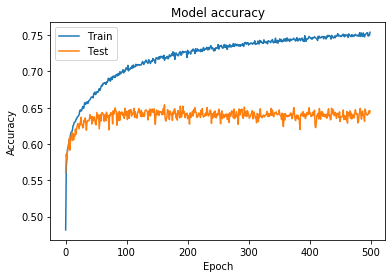

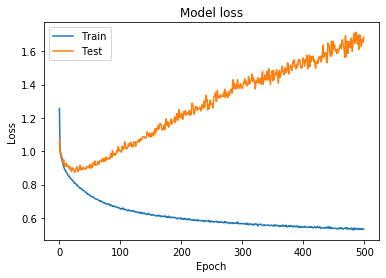

In [34]:
#Ploting the accuracy and loss comparsion for Training and validation 
plot_model_accuracy()
plot_model_loss() 

<b> Execution Summary:</b> After executing epochs= 500 , please find the observation below :
* Maximum Accuracy of Training Model = 75.41 %
* Maximum Accuracy of Validation Model = 65.40%

## Case 3(b) : Initialize the W values to Truncated Normal (Second time execution)

Verifying whether Truncated normalization will give different accuracies for every experiment ?

In [35]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

model = tf.keras.Sequential([
  feature_layer,
    
  layers.Dense(256, activation='relu',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)),
  layers.Dense(512, activation='relu',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=500)

Epoch 1/500
286/286 [==============================] - 8s 30ms/step - loss: 1.2702 - accuracy: 0.4775 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/500
286/286 [==============================] - 4s 15ms/step - loss: 1.0393 - accuracy: 0.5563 - val_loss: 1.0450 - val_accuracy: 0.5623
Epoch 3/500
286/286 [==============================] - 4s 15ms/step - loss: 0.9897 - accuracy: 0.5795 - val_loss: 1.0077 - val_accuracy: 0.5663
Epoch 4/500
286/286 [==============================] - 4s 14ms/step - loss: 0.9720 - accuracy: 0.5839 - val_loss: 0.9502 - val_accuracy: 0.6022
Epoch 5/500
286/286 [==============================] - 4s 14ms/step - loss: 0.9578 - accuracy: 0.5957 - val_loss: 0.9519 - val_accuracy: 0.5946
Epoch 6/500
286/286 [==============================] - 4s 14ms/step - loss: 0.9408 - accuracy: 0.5994 - val_loss: 0.9345 - val_accuracy: 0.6079
Epoch 7/500
286/286 [==============================] - 4s 14ms/step - loss: 0.9222 - accuracy: 0.6062 - val_loss: 0.9344 - val_a

286/286 [==============================] - 4s 14ms/step - loss: 0.6487 - accuracy: 0.7069 - val_loss: 1.0554 - val_accuracy: 0.6382
Epoch 114/500
286/286 [==============================] - 4s 14ms/step - loss: 0.6456 - accuracy: 0.7099 - val_loss: 1.0422 - val_accuracy: 0.6463
Epoch 115/500
286/286 [==============================] - 4s 14ms/step - loss: 0.6484 - accuracy: 0.7055 - val_loss: 1.0553 - val_accuracy: 0.6336
Epoch 116/500
286/286 [==============================] - 4s 14ms/step - loss: 0.6462 - accuracy: 0.7065 - val_loss: 1.0344 - val_accuracy: 0.6444
Epoch 117/500
286/286 [==============================] - 4s 14ms/step - loss: 0.6408 - accuracy: 0.7097 - val_loss: 1.0495 - val_accuracy: 0.6279
Epoch 118/500
286/286 [==============================] - 4s 13ms/step - loss: 0.6454 - accuracy: 0.7076 - val_loss: 1.0660 - val_accuracy: 0.6487
Epoch 119/500
286/286 [==============================] - 4s 14ms/step - loss: 0.6409 - accuracy: 0.7097 - val_loss: 1.0732 - val_accuracy:

286/286 [==============================] - 4s 13ms/step - loss: 0.5847 - accuracy: 0.7307 - val_loss: 1.2308 - val_accuracy: 0.6382
Epoch 226/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5854 - accuracy: 0.7313 - val_loss: 1.2506 - val_accuracy: 0.6459
Epoch 227/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5834 - accuracy: 0.7312 - val_loss: 1.2913 - val_accuracy: 0.6409
Epoch 228/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5859 - accuracy: 0.7336 - val_loss: 1.2715 - val_accuracy: 0.6409
Epoch 229/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5832 - accuracy: 0.7304 - val_loss: 1.2637 - val_accuracy: 0.6450
Epoch 230/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5886 - accuracy: 0.7294 - val_loss: 1.2657 - val_accuracy: 0.6294
Epoch 231/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5826 - accuracy: 0.7311 - val_loss: 1.2662 - val_accuracy:

286/286 [==============================] - 4s 13ms/step - loss: 0.5546 - accuracy: 0.7457 - val_loss: 1.3754 - val_accuracy: 0.6419
Epoch 338/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5532 - accuracy: 0.7440 - val_loss: 1.3966 - val_accuracy: 0.6468
Epoch 339/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5535 - accuracy: 0.7438 - val_loss: 1.3553 - val_accuracy: 0.6409
Epoch 340/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5585 - accuracy: 0.7425 - val_loss: 1.4317 - val_accuracy: 0.6351
Epoch 341/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5543 - accuracy: 0.7416 - val_loss: 1.3970 - val_accuracy: 0.6406
Epoch 342/500
286/286 [==============================] - 4s 13ms/step - loss: 0.5555 - accuracy: 0.7436 - val_loss: 1.4207 - val_accuracy: 0.6448
Epoch 343/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5549 - accuracy: 0.7418 - val_loss: 1.4195 - val_accuracy:

286/286 [==============================] - 4s 13ms/step - loss: 0.5387 - accuracy: 0.7498 - val_loss: 1.5710 - val_accuracy: 0.6422
Epoch 450/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5420 - accuracy: 0.7488 - val_loss: 1.5724 - val_accuracy: 0.6466
Epoch 451/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5426 - accuracy: 0.7477 - val_loss: 1.5846 - val_accuracy: 0.6444
Epoch 452/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5347 - accuracy: 0.7493 - val_loss: 1.5763 - val_accuracy: 0.6446
Epoch 453/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5339 - accuracy: 0.7526 - val_loss: 1.5566 - val_accuracy: 0.6380
Epoch 454/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5372 - accuracy: 0.7506 - val_loss: 1.5512 - val_accuracy: 0.6343
Epoch 455/500
286/286 [==============================] - 4s 14ms/step - loss: 0.5357 - accuracy: 0.7469 - val_loss: 1.5799 - val_accuracy:

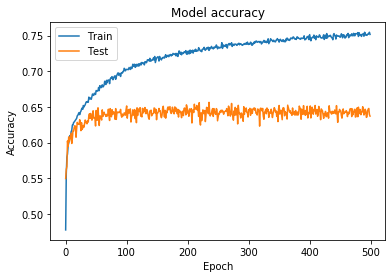

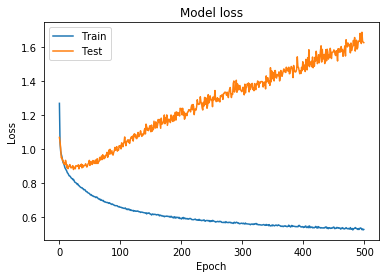

In [37]:
#Ploting the accuracy and loss comparsion for Training and validation 
plot_model_accuracy()
plot_model_loss() 

<b> Execution Summary:</b> After executing epochs= 500 , please find the observation below :
* Maximum Accuracy of Training Model = 75.43 %
* Maximum Accuracy of Validation Model = 65.16%

<b> Conclusion:</b> The Accuracy of Truncated normalization is same for every experiment.

## Case 4 : He normal initializer 

In [30]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

model = tf.keras.Sequential([
  feature_layer,
    
  layers.Dense(256, activation='relu',kernel_initializer=keras.initializers.he_normal(seed=42)),
  layers.Dense(512, activation='relu',kernel_initializer=keras.initializers.he_normal(seed=42)),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=100)

Epoch 1/100
285/285 [==============================] - 4s 13ms/step - loss: 1.6507 - accuracy: 0.4472 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
285/285 [==============================] - 2s 7ms/step - loss: 1.1722 - accuracy: 0.5282 - val_loss: 1.4161 - val_accuracy: 0.5069
Epoch 3/100
285/285 [==============================] - 2s 7ms/step - loss: 1.1328 - accuracy: 0.5443 - val_loss: 1.0211 - val_accuracy: 0.5778
Epoch 4/100
285/285 [==============================] - 2s 8ms/step - loss: 1.0510 - accuracy: 0.5697 - val_loss: 1.3994 - val_accuracy: 0.5706
Epoch 5/100
285/285 [==============================] - 2s 7ms/step - loss: 1.0663 - accuracy: 0.5680 - val_loss: 0.9508 - val_accuracy: 0.5924
Epoch 6/100
285/285 [==============================] - 2s 7ms/step - loss: 1.0386 - accuracy: 0.5764 - val_loss: 0.9663 - val_accuracy: 0.5867
Epoch 7/100
285/285 [==============================] - 2s 7ms/step - loss: 0.9959 - accuracy: 0.5861 - val_loss: 1.1026 - val_accurac

Epoch 58/100
285/285 [==============================] - 3s 10ms/step - loss: 0.7466 - accuracy: 0.6668 - val_loss: 0.8953 - val_accuracy: 0.6352
Epoch 59/100
285/285 [==============================] - 3s 10ms/step - loss: 0.7429 - accuracy: 0.6688 - val_loss: 0.9017 - val_accuracy: 0.6393
Epoch 60/100
285/285 [==============================] - 3s 9ms/step - loss: 0.7411 - accuracy: 0.6683 - val_loss: 0.9032 - val_accuracy: 0.6317
Epoch 61/100
285/285 [==============================] - 3s 9ms/step - loss: 0.7405 - accuracy: 0.6700 - val_loss: 0.8904 - val_accuracy: 0.6450
Epoch 62/100
285/285 [==============================] - 3s 9ms/step - loss: 0.7337 - accuracy: 0.6718 - val_loss: 0.9022 - val_accuracy: 0.6354
Epoch 63/100
285/285 [==============================] - 3s 9ms/step - loss: 0.7347 - accuracy: 0.6667 - val_loss: 0.9329 - val_accuracy: 0.6267
Epoch 64/100
285/285 [==============================] - 3s 10ms/step - loss: 0.7303 - accuracy: 0.6717 - val_loss: 0.9099 - val_accura

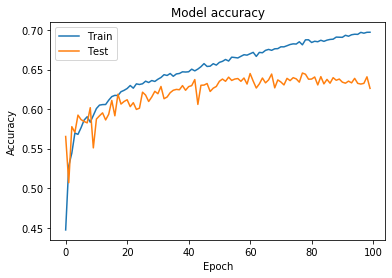

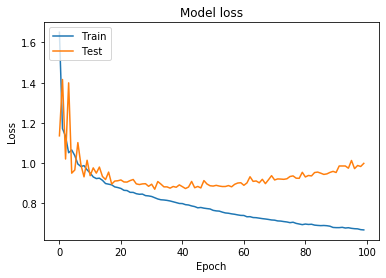

In [31]:
#Ploting the accuracy and loss comparsion for Training and validation 
plot_model_accuracy()
plot_model_loss() 

<b> Execution Summary:</b> After executing epochs= 100 , please find the observation below :
* Maximum Accuracy of Training Model = 70.01 %
* Maximum Accuracy of Validation Model = 64.02%

## Case 5 : L1 Regularization

In [21]:
from keras.regularizers import l1

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

model = tf.keras.Sequential([
  feature_layer,
    
  layers.Dense(256, activation='relu',kernel_regularizer=l1(0.01)),
  layers.Dense(512, activation='relu',kernel_regularizer=l1(0.01)),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=100)

Epoch 1/100
285/285 [==============================] - 4s 13ms/step - loss: 18.1793 - accuracy: 0.3559 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
285/285 [==============================] - 2s 7ms/step - loss: 4.1696 - accuracy: 0.3869 - val_loss: 2.9672 - val_accuracy: 0.3794
Epoch 3/100
285/285 [==============================] - 2s 7ms/step - loss: 2.3944 - accuracy: 0.3936 - val_loss: 1.9917 - val_accuracy: 0.3842
Epoch 4/100
285/285 [==============================] - 2s 7ms/step - loss: 1.8058 - accuracy: 0.4070 - val_loss: 1.6954 - val_accuracy: 0.3978
Epoch 5/100
285/285 [==============================] - 2s 7ms/step - loss: 1.6492 - accuracy: 0.4117 - val_loss: 1.6315 - val_accuracy: 0.3838
Epoch 6/100
285/285 [==============================] - 2s 8ms/step - loss: 1.6187 - accuracy: 0.4119 - val_loss: 1.6224 - val_accuracy: 0.3986
Epoch 7/100
285/285 [==============================] - 2s 8ms/step - loss: 1.6005 - accuracy: 0.4114 - val_loss: 1.6044 - val_accura

Epoch 58/100
285/285 [==============================] - 3s 9ms/step - loss: 1.5752 - accuracy: 0.4194 - val_loss: 1.5941 - val_accuracy: 0.3995
Epoch 59/100
285/285 [==============================] - 3s 9ms/step - loss: 1.5750 - accuracy: 0.4154 - val_loss: 1.5911 - val_accuracy: 0.4024
Epoch 60/100
285/285 [==============================] - 3s 9ms/step - loss: 1.5750 - accuracy: 0.4187 - val_loss: 1.5940 - val_accuracy: 0.3995
Epoch 61/100
285/285 [==============================] - 3s 9ms/step - loss: 1.5749 - accuracy: 0.4185 - val_loss: 1.5918 - val_accuracy: 0.4024
Epoch 62/100
285/285 [==============================] - 3s 9ms/step - loss: 1.5745 - accuracy: 0.4194 - val_loss: 1.5926 - val_accuracy: 0.3943
Epoch 63/100
285/285 [==============================] - 3s 9ms/step - loss: 1.5743 - accuracy: 0.4167 - val_loss: 1.5922 - val_accuracy: 0.3986
Epoch 64/100
285/285 [==============================] - 3s 9ms/step - loss: 1.5733 - accuracy: 0.4204 - val_loss: 1.5920 - val_accuracy:

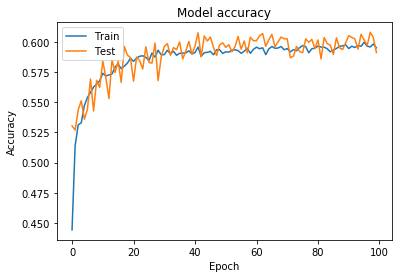

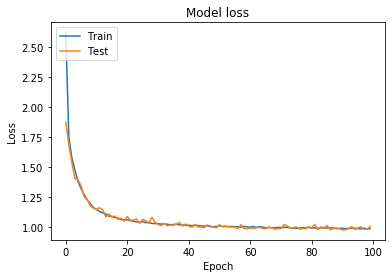

In [36]:
#Ploting the accuracy and loss comparsion for Training and validation 
plot_model_accuracy()
plot_model_loss() 

<b> Execution Summary:</b> After executing epochs= 100 , please find the observation below :
* Maximum Accuracy of Training Model = 42.09 %
* Maximum Accuracy of Validation Model = 40.26%

## Case 6 : L2 Regularization

In [35]:
from keras.regularizers import l2

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

model = tf.keras.Sequential([
  feature_layer,
    
  layers.Dense(256, activation='relu',kernel_regularizer=l2(0.01)),
  layers.Dense(512, activation='relu',kernel_regularizer=l2(0.01)),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=100)

Epoch 1/100
286/286 [==============================] - 4s 13ms/step - loss: 2.6241 - accuracy: 0.4441 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
286/286 [==============================] - 2s 7ms/step - loss: 1.7466 - accuracy: 0.5140 - val_loss: 1.6875 - val_accuracy: 0.5270
Epoch 3/100
286/286 [==============================] - 2s 7ms/step - loss: 1.5752 - accuracy: 0.5312 - val_loss: 1.5345 - val_accuracy: 0.5436
Epoch 4/100
286/286 [==============================] - 2s 8ms/step - loss: 1.4733 - accuracy: 0.5330 - val_loss: 1.4041 - val_accuracy: 0.5513
Epoch 5/100
286/286 [==============================] - 2s 8ms/step - loss: 1.3832 - accuracy: 0.5472 - val_loss: 1.3970 - val_accuracy: 0.5360
Epoch 6/100
286/286 [==============================] - 2s 7ms/step - loss: 1.3209 - accuracy: 0.5540 - val_loss: 1.3435 - val_accuracy: 0.5441
Epoch 7/100
286/286 [==============================] - 2s 8ms/step - loss: 1.2727 - accuracy: 0.5581 - val_loss: 1.2567 - val_accurac

Epoch 58/100
286/286 [==============================] - 3s 9ms/step - loss: 1.0028 - accuracy: 0.5949 - val_loss: 1.0224 - val_accuracy: 0.5910
Epoch 59/100
286/286 [==============================] - 3s 9ms/step - loss: 1.0082 - accuracy: 0.5906 - val_loss: 0.9886 - val_accuracy: 0.6039
Epoch 60/100
286/286 [==============================] - 3s 9ms/step - loss: 1.0042 - accuracy: 0.5939 - val_loss: 0.9900 - val_accuracy: 0.6011
Epoch 61/100
286/286 [==============================] - 3s 9ms/step - loss: 1.0024 - accuracy: 0.5957 - val_loss: 0.9945 - val_accuracy: 0.6011
Epoch 62/100
286/286 [==============================] - 3s 9ms/step - loss: 1.0073 - accuracy: 0.5944 - val_loss: 0.9923 - val_accuracy: 0.6053
Epoch 63/100
286/286 [==============================] - 3s 9ms/step - loss: 0.9998 - accuracy: 0.5952 - val_loss: 0.9965 - val_accuracy: 0.6070
Epoch 64/100
286/286 [==============================] - 3s 9ms/step - loss: 1.0052 - accuracy: 0.5895 - val_loss: 1.0002 - val_accuracy:

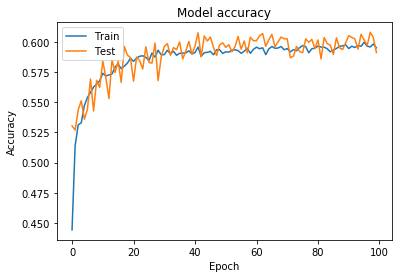

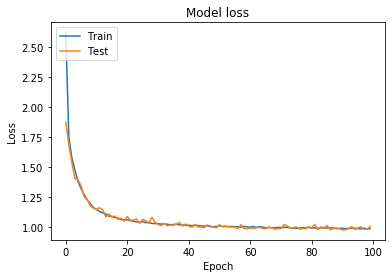

In [36]:
#Ploting the accuracy and loss comparsion for Training and validation 
plot_model_accuracy()
plot_model_loss() 

<b> Execution Summary:</b> After executing epochs= 100 , please find the observation below :
* Maximum Accuracy of Training Model = 59.98 %
* Maximum Accuracy of Validation Model = 60.64%

## Final Comparison of all the results

In [26]:
accuracies=pd.DataFrame([{"accuracy":0.7540,"val_accuracy": 0.6531},{"accuracy": 0.3393, "val_accuracy": 0.4059},{"accuracy": 0.7540,"val_accuracy": 0.6529},{"accuracy": 0.7541,"val_accuracy": 0.6540},{"accuracy": 0.7001, "val_accuracy": 0.6402},{"accuracy": 0.4209,"val_accuracy": 0.4026},{"accuracy": 0.5998, "val_accuracy": 0.6064}])

In [27]:
accuracies

,accuracy,val_accuracy
0,0.7540,0.6531
1,0.3393,0.4059
2,0.7540,0.6529
3,0.7541,0.6540
4,0.7001,0.6402
5,0.4209,0.4026
6,0.5998,0.6064


In [28]:
accuracies.rename(index={0:"Default",1:"Weight_zero",2:"Bias_zero",3:"Truncated_Normal",4:"He_Normal",5:"L1_Regularization",6:"L2_Regularization"})

,accuracy,val_accuracy
Default,0.7540,0.6531
Weight_zero,0.3393,0.4059
Bias_zero,0.7540,0.6529
Truncated_Normal,0.7541,0.6540
He_Normal,0.7001,0.6402
L1_Regularization,0.4209,0.4026
L2_Regularization,0.5998,0.6064


## Adhoc Conditions

## Case 7: Default Condition with 3 hidden layers - Initiated the weight and bias randomly

In [22]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(1024, activation='relu'),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=500)


Epoch 1/500
286/286 [==============================] - 9s 30ms/step - loss: 1.3571 - accuracy: 0.4647 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/500
286/286 [==============================] - 5s 18ms/step - loss: 1.0383 - accuracy: 0.5571 - val_loss: 1.0138 - val_accuracy: 0.5774
Epoch 3/500
286/286 [==============================] - 5s 18ms/step - loss: 0.9965 - accuracy: 0.5769 - val_loss: 1.0062 - val_accuracy: 0.5720
Epoch 4/500
286/286 [==============================] - 5s 18ms/step - loss: 0.9819 - accuracy: 0.5821 - val_loss: 0.9905 - val_accuracy: 0.5763
Epoch 5/500
286/286 [==============================] - 5s 19ms/step - loss: 0.9515 - accuracy: 0.5949 - val_loss: 0.9587 - val_accuracy: 0.5961
Epoch 6/500
286/286 [==============================] - 5s 18ms/step - loss: 0.9378 - accuracy: 0.5969 - val_loss: 0.9485 - val_accuracy: 0.5913
Epoch 7/500
286/286 [==============================] - 5s 18ms/step - loss: 0.9276 - accuracy: 0.6040 - val_loss: 0.9432 - val_a

286/286 [==============================] - 5s 18ms/step - loss: 0.6122 - accuracy: 0.7204 - val_loss: 1.1612 - val_accuracy: 0.6415
Epoch 114/500
286/286 [==============================] - 5s 18ms/step - loss: 0.6138 - accuracy: 0.7187 - val_loss: 1.1899 - val_accuracy: 0.6400
Epoch 115/500
286/286 [==============================] - 5s 18ms/step - loss: 0.6131 - accuracy: 0.7170 - val_loss: 1.1560 - val_accuracy: 0.6415
Epoch 116/500
286/286 [==============================] - 5s 18ms/step - loss: 0.6194 - accuracy: 0.7192 - val_loss: 1.2415 - val_accuracy: 0.6400
Epoch 117/500
286/286 [==============================] - 5s 18ms/step - loss: 0.6076 - accuracy: 0.7223 - val_loss: 1.1834 - val_accuracy: 0.6474
Epoch 118/500
286/286 [==============================] - 5s 18ms/step - loss: 0.6052 - accuracy: 0.7223 - val_loss: 1.2217 - val_accuracy: 0.6367
Epoch 119/500
286/286 [==============================] - 5s 18ms/step - loss: 0.6103 - accuracy: 0.7208 - val_loss: 1.2546 - val_accuracy:

286/286 [==============================] - 5s 18ms/step - loss: 0.5552 - accuracy: 0.7420 - val_loss: 1.6389 - val_accuracy: 0.6441
Epoch 226/500
286/286 [==============================] - 5s 19ms/step - loss: 0.5434 - accuracy: 0.7467 - val_loss: 1.6206 - val_accuracy: 0.6490
Epoch 227/500
286/286 [==============================] - 5s 18ms/step - loss: 0.5412 - accuracy: 0.7471 - val_loss: 1.5771 - val_accuracy: 0.6411
Epoch 228/500
286/286 [==============================] - 5s 18ms/step - loss: 0.5553 - accuracy: 0.7416 - val_loss: 1.6299 - val_accuracy: 0.6452
Epoch 229/500
286/286 [==============================] - 5s 18ms/step - loss: 0.5467 - accuracy: 0.7451 - val_loss: 1.6560 - val_accuracy: 0.6430
Epoch 230/500
286/286 [==============================] - 5s 18ms/step - loss: 0.5536 - accuracy: 0.7409 - val_loss: 1.6174 - val_accuracy: 0.6435
Epoch 231/500
286/286 [==============================] - 5s 18ms/step - loss: 0.5478 - accuracy: 0.7432 - val_loss: 1.6138 - val_accuracy:

286/286 [==============================] - 6s 19ms/step - loss: 0.5169 - accuracy: 0.7578 - val_loss: 1.9267 - val_accuracy: 0.6358
Epoch 338/500
286/286 [==============================] - 5s 18ms/step - loss: 0.5258 - accuracy: 0.7534 - val_loss: 1.9078 - val_accuracy: 0.6457
Epoch 339/500
286/286 [==============================] - 6s 19ms/step - loss: 0.5216 - accuracy: 0.7532 - val_loss: 1.8080 - val_accuracy: 0.6426
Epoch 340/500
286/286 [==============================] - 6s 19ms/step - loss: 0.5191 - accuracy: 0.7572 - val_loss: 1.9699 - val_accuracy: 0.6496
Epoch 341/500
286/286 [==============================] - 6s 21ms/step - loss: 0.5124 - accuracy: 0.7582 - val_loss: 1.9758 - val_accuracy: 0.6448
Epoch 342/500
286/286 [==============================] - 5s 19ms/step - loss: 0.5051 - accuracy: 0.7628 - val_loss: 1.9155 - val_accuracy: 0.6507
Epoch 343/500
286/286 [==============================] - 6s 19ms/step - loss: 0.5136 - accuracy: 0.7597 - val_loss: 2.0604 - val_accuracy:

286/286 [==============================] - 5s 18ms/step - loss: 0.4978 - accuracy: 0.7618 - val_loss: 2.4695 - val_accuracy: 0.6452
Epoch 450/500
286/286 [==============================] - 5s 18ms/step - loss: 0.4968 - accuracy: 0.7661 - val_loss: 2.3187 - val_accuracy: 0.6409
Epoch 451/500
286/286 [==============================] - 5s 19ms/step - loss: 0.4999 - accuracy: 0.7648 - val_loss: 2.4202 - val_accuracy: 0.6472
Epoch 452/500
286/286 [==============================] - 5s 19ms/step - loss: 0.5042 - accuracy: 0.7620 - val_loss: 2.3579 - val_accuracy: 0.6402
Epoch 453/500
286/286 [==============================] - 5s 19ms/step - loss: 0.4975 - accuracy: 0.7633 - val_loss: 2.2450 - val_accuracy: 0.6343
Epoch 454/500
286/286 [==============================] - 5s 19ms/step - loss: 0.4960 - accuracy: 0.7654 - val_loss: 2.2124 - val_accuracy: 0.6490
Epoch 455/500
286/286 [==============================] - 4s 15ms/step - loss: 0.4920 - accuracy: 0.7643 - val_loss: 2.4937 - val_accuracy:

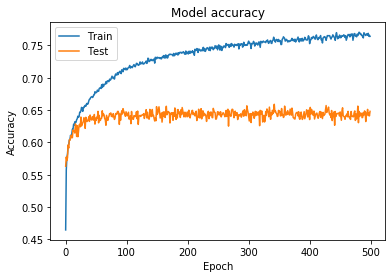

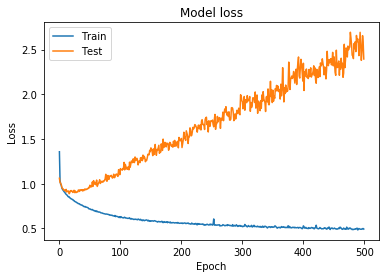

In [25]:
#Ploting the accuracy and loss comparsion for Training and validation 
plot_model_accuracy()
plot_model_loss() 

<b> Execution Summary:</b> After executing epochs= 500 , please find the observation below :
* Maximum Accuracy of Training Model = 77.05 %
* Maximum Accuracy of Validation Model = 65.71 %
* There is no big increse in the efficiency even after adding an additional hidden layer

## Case 8 : Initialize the W values to Normal

In [18]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

model = tf.keras.Sequential([
  feature_layer,
    
  layers.Dense(256, activation='relu',kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)),
  layers.Dense(512, activation='relu',kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=500)

Epoch 1/500
285/285 [==============================] - 7s 25ms/step - loss: 1.2353 - accuracy: 0.4897 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/500
285/285 [==============================] - 4s 13ms/step - loss: 1.0615 - accuracy: 0.5530 - val_loss: 0.9867 - val_accuracy: 0.5806
Epoch 3/500
285/285 [==============================] - 4s 13ms/step - loss: 0.9839 - accuracy: 0.5874 - val_loss: 0.9516 - val_accuracy: 0.5894
Epoch 4/500
285/285 [==============================] - 4s 13ms/step - loss: 0.9705 - accuracy: 0.5898 - val_loss: 0.9807 - val_accuracy: 0.5915
Epoch 5/500
285/285 [==============================] - 4s 13ms/step - loss: 0.9482 - accuracy: 0.5954 - val_loss: 0.9909 - val_accuracy: 0.5793
Epoch 6/500
285/285 [==============================] - 4s 13ms/step - loss: 0.9329 - accuracy: 0.6037 - val_loss: 0.9340 - val_accuracy: 0.5952
Epoch 7/500
285/285 [==============================] - 4s 13ms/step - loss: 0.9163 - accuracy: 0.6092 - val_loss: 0.9339 - val_a

285/285 [==============================] - 4s 13ms/step - loss: 0.7232 - accuracy: 0.6774 - val_loss: 0.9203 - val_accuracy: 0.6293
Epoch 58/500
285/285 [==============================] - 4s 13ms/step - loss: 0.7232 - accuracy: 0.6767 - val_loss: 0.8915 - val_accuracy: 0.6317
Epoch 59/500
285/285 [==============================] - 4s 13ms/step - loss: 0.7197 - accuracy: 0.6789 - val_loss: 0.9011 - val_accuracy: 0.6293
Epoch 60/500
285/285 [==============================] - 4s 13ms/step - loss: 0.7205 - accuracy: 0.6764 - val_loss: 0.9053 - val_accuracy: 0.6295
Epoch 61/500
285/285 [==============================] - 4s 13ms/step - loss: 0.7178 - accuracy: 0.6795 - val_loss: 0.9253 - val_accuracy: 0.6323
Epoch 62/500
285/285 [==============================] - 4s 13ms/step - loss: 0.7167 - accuracy: 0.6796 - val_loss: 0.8984 - val_accuracy: 0.6302
Epoch 63/500
285/285 [==============================] - 4s 13ms/step - loss: 0.7100 - accuracy: 0.6834 - val_loss: 0.9117 - val_accuracy: 0.637

285/285 [==============================] - 4s 13ms/step - loss: 0.6494 - accuracy: 0.7023 - val_loss: 1.0132 - val_accuracy: 0.6299
Epoch 114/500
285/285 [==============================] - 4s 13ms/step - loss: 0.6448 - accuracy: 0.7075 - val_loss: 1.0220 - val_accuracy: 0.6393
Epoch 115/500
285/285 [==============================] - 4s 13ms/step - loss: 0.6433 - accuracy: 0.7105 - val_loss: 0.9996 - val_accuracy: 0.6247
Epoch 116/500
285/285 [==============================] - 4s 13ms/step - loss: 0.6460 - accuracy: 0.7059 - val_loss: 1.0237 - val_accuracy: 0.6334
Epoch 117/500
285/285 [==============================] - 4s 13ms/step - loss: 0.6408 - accuracy: 0.7087 - val_loss: 1.0359 - val_accuracy: 0.6336
Epoch 118/500
285/285 [==============================] - 4s 14ms/step - loss: 0.6427 - accuracy: 0.7082 - val_loss: 1.0287 - val_accuracy: 0.6321
Epoch 119/500
285/285 [==============================] - 4s 13ms/step - loss: 0.6401 - accuracy: 0.7094 - val_loss: 1.0301 - val_accuracy:

285/285 [==============================] - 4s 13ms/step - loss: 0.6095 - accuracy: 0.7219 - val_loss: 1.1138 - val_accuracy: 0.6288
Epoch 170/500
285/285 [==============================] - 4s 13ms/step - loss: 0.6112 - accuracy: 0.7201 - val_loss: 1.1460 - val_accuracy: 0.6284
Epoch 171/500
285/285 [==============================] - 4s 13ms/step - loss: 0.6095 - accuracy: 0.7213 - val_loss: 1.1366 - val_accuracy: 0.6384
Epoch 172/500
285/285 [==============================] - 4s 14ms/step - loss: 0.6096 - accuracy: 0.7221 - val_loss: 1.1776 - val_accuracy: 0.6352
Epoch 173/500
285/285 [==============================] - 4s 14ms/step - loss: 0.6062 - accuracy: 0.7230 - val_loss: 1.1522 - val_accuracy: 0.6339
Epoch 174/500
285/285 [==============================] - 4s 14ms/step - loss: 0.6065 - accuracy: 0.7230 - val_loss: 1.1370 - val_accuracy: 0.6269
Epoch 175/500
285/285 [==============================] - 4s 13ms/step - loss: 0.6094 - accuracy: 0.7212 - val_loss: 1.1459 - val_accuracy:

285/285 [==============================] - 4s 13ms/step - loss: 0.5860 - accuracy: 0.7298 - val_loss: 1.2354 - val_accuracy: 0.6306
Epoch 226/500
285/285 [==============================] - 4s 13ms/step - loss: 0.5878 - accuracy: 0.7278 - val_loss: 1.2216 - val_accuracy: 0.6260
Epoch 227/500
285/285 [==============================] - 4s 13ms/step - loss: 0.5870 - accuracy: 0.7276 - val_loss: 1.2149 - val_accuracy: 0.6326
Epoch 228/500
285/285 [==============================] - 4s 13ms/step - loss: 0.5839 - accuracy: 0.7306 - val_loss: 1.2353 - val_accuracy: 0.6304
Epoch 229/500
285/285 [==============================] - 4s 13ms/step - loss: 0.5796 - accuracy: 0.7356 - val_loss: 1.2461 - val_accuracy: 0.6227
Epoch 230/500
285/285 [==============================] - 4s 13ms/step - loss: 0.5841 - accuracy: 0.7334 - val_loss: 1.2357 - val_accuracy: 0.6304
Epoch 231/500
285/285 [==============================] - 4s 13ms/step - loss: 0.5816 - accuracy: 0.7330 - val_loss: 1.2324 - val_accuracy:

285/285 [==============================] - 4s 13ms/step - loss: 0.5677 - accuracy: 0.7391 - val_loss: 1.3754 - val_accuracy: 0.6306
Epoch 282/500
285/285 [==============================] - 4s 13ms/step - loss: 0.5756 - accuracy: 0.7359 - val_loss: 1.2961 - val_accuracy: 0.6334
Epoch 283/500
285/285 [==============================] - 4s 13ms/step - loss: 0.5690 - accuracy: 0.7374 - val_loss: 1.3207 - val_accuracy: 0.6350
Epoch 284/500
285/285 [==============================] - 4s 13ms/step - loss: 0.5665 - accuracy: 0.7389 - val_loss: 1.3161 - val_accuracy: 0.6308
Epoch 285/500
285/285 [==============================] - 4s 13ms/step - loss: 0.5651 - accuracy: 0.7409 - val_loss: 1.3785 - val_accuracy: 0.6304
Epoch 286/500
285/285 [==============================] - 4s 13ms/step - loss: 0.5673 - accuracy: 0.7385 - val_loss: 1.3298 - val_accuracy: 0.6304
Epoch 287/500
285/285 [==============================] - 4s 13ms/step - loss: 0.5665 - accuracy: 0.7357 - val_loss: 1.3580 - val_accuracy:

285/285 [==============================] - 2s 7ms/step - loss: 0.5532 - accuracy: 0.7453 - val_loss: 1.4044 - val_accuracy: 0.6295
Epoch 338/500
285/285 [==============================] - 2s 8ms/step - loss: 0.5526 - accuracy: 0.7448 - val_loss: 1.4498 - val_accuracy: 0.6275
Epoch 339/500
285/285 [==============================] - 2s 9ms/step - loss: 0.5541 - accuracy: 0.7444 - val_loss: 1.4397 - val_accuracy: 0.6382
Epoch 340/500
285/285 [==============================] - 2s 9ms/step - loss: 0.5542 - accuracy: 0.7433 - val_loss: 1.4390 - val_accuracy: 0.6352
Epoch 341/500
285/285 [==============================] - 2s 9ms/step - loss: 0.5526 - accuracy: 0.7448 - val_loss: 1.4329 - val_accuracy: 0.6380
Epoch 342/500
285/285 [==============================] - 2s 9ms/step - loss: 0.5544 - accuracy: 0.7418 - val_loss: 1.4291 - val_accuracy: 0.6317
Epoch 343/500
285/285 [==============================] - 2s 9ms/step - loss: 0.5576 - accuracy: 0.7421 - val_loss: 1.4289 - val_accuracy: 0.6341

285/285 [==============================] - 3s 9ms/step - loss: 0.5420 - accuracy: 0.7493 - val_loss: 1.5185 - val_accuracy: 0.6321
Epoch 394/500
285/285 [==============================] - 3s 9ms/step - loss: 0.5482 - accuracy: 0.7463 - val_loss: 1.5330 - val_accuracy: 0.6291
Epoch 395/500
285/285 [==============================] - 3s 9ms/step - loss: 0.5434 - accuracy: 0.7484 - val_loss: 1.4971 - val_accuracy: 0.6295
Epoch 396/500
285/285 [==============================] - 3s 9ms/step - loss: 0.5445 - accuracy: 0.7464 - val_loss: 1.5621 - val_accuracy: 0.6363
Epoch 397/500
285/285 [==============================] - 3s 9ms/step - loss: 0.5463 - accuracy: 0.7444 - val_loss: 1.5276 - val_accuracy: 0.6269
Epoch 398/500
285/285 [==============================] - 3s 9ms/step - loss: 0.5483 - accuracy: 0.7459 - val_loss: 1.4907 - val_accuracy: 0.6269
Epoch 399/500
285/285 [==============================] - 3s 9ms/step - loss: 0.5404 - accuracy: 0.7499 - val_loss: 1.5756 - val_accuracy: 0.6299

285/285 [==============================] - 2s 9ms/step - loss: 0.5381 - accuracy: 0.7476 - val_loss: 1.6367 - val_accuracy: 0.6302
Epoch 450/500
285/285 [==============================] - 2s 9ms/step - loss: 0.5399 - accuracy: 0.7497 - val_loss: 1.6269 - val_accuracy: 0.6323
Epoch 451/500
285/285 [==============================] - 2s 8ms/step - loss: 0.5383 - accuracy: 0.7463 - val_loss: 1.6306 - val_accuracy: 0.6299
Epoch 452/500
285/285 [==============================] - 2s 9ms/step - loss: 0.5384 - accuracy: 0.7472 - val_loss: 1.6563 - val_accuracy: 0.6341
Epoch 453/500
285/285 [==============================] - 2s 9ms/step - loss: 0.5412 - accuracy: 0.7493 - val_loss: 1.6131 - val_accuracy: 0.6295
Epoch 454/500
285/285 [==============================] - 2s 9ms/step - loss: 0.5368 - accuracy: 0.7500 - val_loss: 1.6237 - val_accuracy: 0.6297
Epoch 455/500
285/285 [==============================] - 2s 9ms/step - loss: 0.5373 - accuracy: 0.7507 - val_loss: 1.6641 - val_accuracy: 0.6404

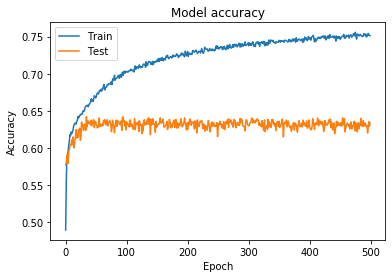

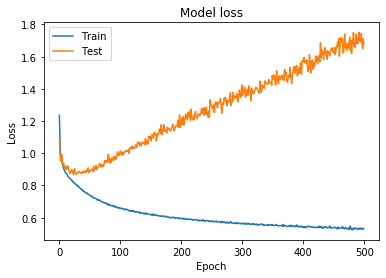

In [19]:
#Ploting the accuracy and loss comparsion for Training and validation 
plot_model_accuracy()
plot_model_loss() 

<b> Execution Summary:</b> After executing epochs= 500 , please find the observation below :
* Maximum Accuracy of Training Model = 75.42 %
* Maximum Accuracy of Validation Model = 63.98%

## Case 9 : Glorot normal initializer or Xavier normal initializer.

In [29]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

model = tf.keras.Sequential([
  feature_layer,
    
  layers.Dense(256, activation='relu',kernel_initializer=keras.initializers.glorot_normal(seed=42)),
  layers.Dense(512, activation='relu',kernel_initializer=keras.initializers.glorot_normal(seed=42)),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=100)

Epoch 1/100
285/285 [==============================] - 4s 12ms/step - loss: 1.3472 - accuracy: 0.4580 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
285/285 [==============================] - 2s 7ms/step - loss: 1.0837 - accuracy: 0.5505 - val_loss: 1.0817 - val_accuracy: 0.5501
Epoch 3/100
285/285 [==============================] - 2s 7ms/step - loss: 1.0116 - accuracy: 0.5804 - val_loss: 1.0116 - val_accuracy: 0.5778
Epoch 4/100
285/285 [==============================] - 2s 7ms/step - loss: 0.9900 - accuracy: 0.5826 - val_loss: 0.9678 - val_accuracy: 0.5876
Epoch 5/100
285/285 [==============================] - 2s 7ms/step - loss: 0.9751 - accuracy: 0.5905 - val_loss: 0.9892 - val_accuracy: 0.5856
Epoch 6/100
285/285 [==============================] - 2s 7ms/step - loss: 0.9561 - accuracy: 0.5958 - val_loss: 0.9679 - val_accuracy: 0.5861
Epoch 7/100
285/285 [==============================] - 2s 7ms/step - loss: 0.9434 - accuracy: 0.6013 - val_loss: 0.9831 - val_accurac

Epoch 58/100
285/285 [==============================] - 3s 9ms/step - loss: 0.7300 - accuracy: 0.6715 - val_loss: 0.9130 - val_accuracy: 0.6347
Epoch 59/100
285/285 [==============================] - 3s 9ms/step - loss: 0.7231 - accuracy: 0.6790 - val_loss: 0.9049 - val_accuracy: 0.6376
Epoch 60/100
285/285 [==============================] - 2s 9ms/step - loss: 0.7184 - accuracy: 0.6780 - val_loss: 0.9164 - val_accuracy: 0.6330
Epoch 61/100
285/285 [==============================] - 2s 9ms/step - loss: 0.7230 - accuracy: 0.6762 - val_loss: 0.9046 - val_accuracy: 0.6365
Epoch 62/100
285/285 [==============================] - 2s 9ms/step - loss: 0.7159 - accuracy: 0.6787 - val_loss: 0.9218 - val_accuracy: 0.6339
Epoch 63/100
285/285 [==============================] - 3s 9ms/step - loss: 0.7145 - accuracy: 0.6786 - val_loss: 0.9270 - val_accuracy: 0.6334
Epoch 64/100
285/285 [==============================] - 3s 9ms/step - loss: 0.7127 - accuracy: 0.6798 - val_loss: 0.9287 - val_accuracy:

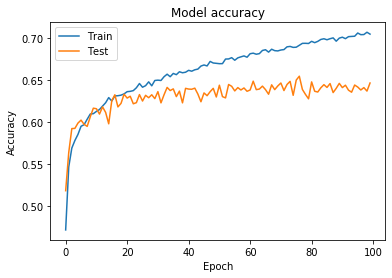

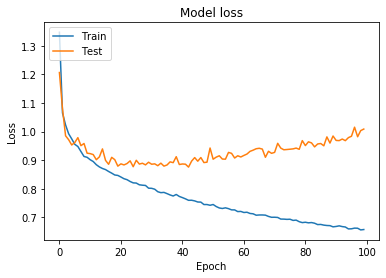

In [23]:
#Ploting the accuracy and loss comparsion for Training and validation 
plot_model_accuracy()
plot_model_loss() 

<b> Execution Summary:</b> After executing epochs= 100 , please find the observation below :
* Maximum Accuracy of Training Model = 70.38 %
* Maximum Accuracy of Validation Model = 64.17%

## Case 10 : Early Stopping

In [33]:
from keras.callbacks import EarlyStopping

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

model = tf.keras.Sequential([
  feature_layer,
    
  layers.Dense(256, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1)

history = model.fit(train_ds, validation_data=val_ds,epochs=100,callbacks=[es])

Epoch 1/100
286/286 [==============================] - 4s 12ms/step - loss: 1.3790 - accuracy: 0.4685 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
286/286 [==============================] - 2s 7ms/step - loss: 1.1088 - accuracy: 0.5408 - val_loss: 1.1561 - val_accuracy: 0.4721
Epoch 3/100
286/286 [==============================] - 2s 7ms/step - loss: 1.0290 - accuracy: 0.5740 - val_loss: 1.0044 - val_accuracy: 0.5735
Epoch 4/100
286/286 [==============================] - 2s 7ms/step - loss: 0.9976 - accuracy: 0.5830 - val_loss: 1.0123 - val_accuracy: 0.5592
Epoch 00004: early stopping


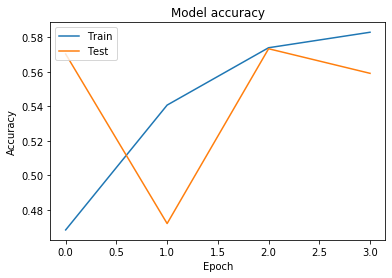

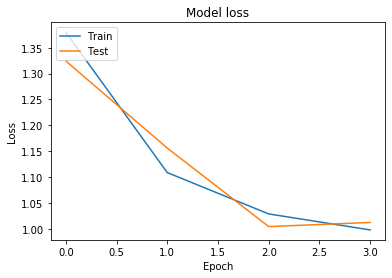

In [34]:
#Ploting the accuracy and loss comparsion for Training and validation 
plot_model_accuracy()
plot_model_loss() 

<b> Execution Summary:</b> After executing epochs= 100 , please find the observation below :
* Early stopping occured at Epoch = 4
* Maximum Accuracy of Training Model = 58.30%
* Maximum Accuracy of Validation Model = 57.35%